In [49]:
import sys
sys.path.append('../src')

from astropy.io import fits
import redshift_cross_correlation as rcc
import redshift_cc_sdss as crs
import matplotlib.pyplot as plt
import numpy as np
# temp but here
from astroquery.sdss import SDSS

In [50]:
flux, wavelength = crs.get_spectrum()

Spectrum retrieved!
SDSS catalog redshift: None


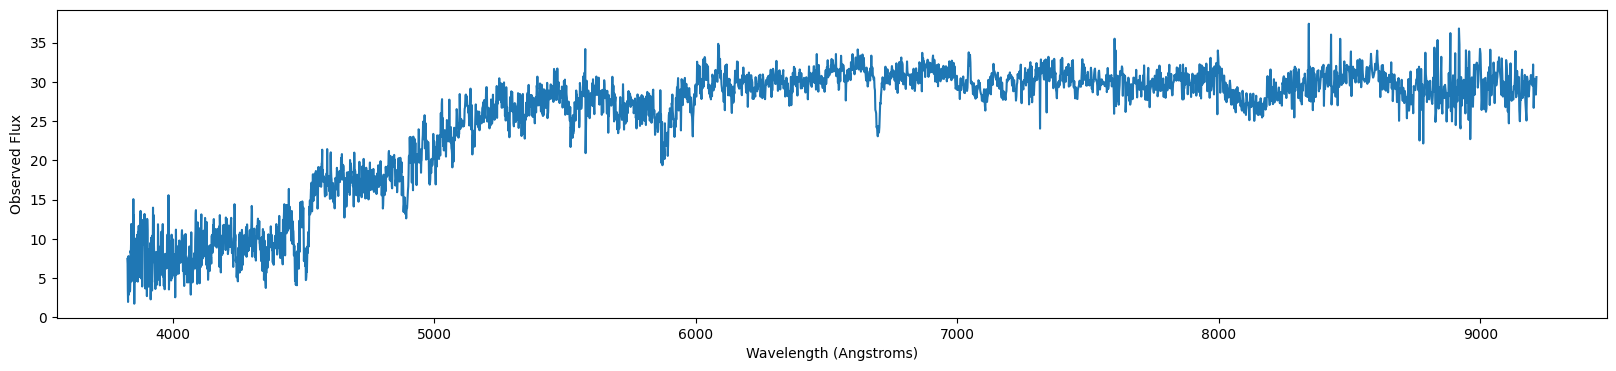

In [51]:
plt.figure(figsize=(20,4))
plt.plot(wavelength, flux)
plt.ylabel("Observed Flux")
plt.xlabel("Wavelength (Angstroms)")

rest_lines = [6563, 5007, 4861]  # Hα, [O III], Hβ has more rest lines than that but those are most prominent in galaxies. Also figure out a way to automate this.

# Just looking, visually, it seems that the absorption lines are more prominent than rest_lines.


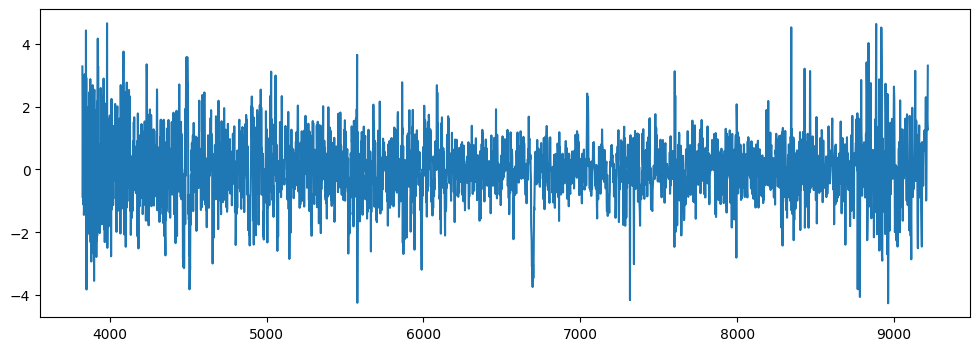

In [52]:
flux1 = rcc.normalize_spectrum(flux.astype(np.float64))
plt.figure(figsize=(12,4))
plt.plot(wavelength, flux1)


In [53]:
# Rest lines for this galaxy (I had to search them up. find a way to automate this.)
absorption_lines = [
    4102.89,  # H-delta
    4305.0,   # G-band (CH)
    4341.68,  # H-gamma
    4862.68,  # H-beta
    6564.61,  # H-alpha
    5175 # Weird blend MG I
]

#I dont know if it will work as intended, but i'm just going to flip my flux to measure the absorption lines
z = rcc.redshift_estimate_for_z(flux=-flux, wl=wavelength, rest_lines=absorption_lines, wl_max=np.max(wavelength), wl_min=np.min(wavelength))


Iteration 0: best_shift=2899, best_z=0.13562, max_corr=3024.302
Iteration 1: best_shift=2899, best_z=0.13562, max_corr=3024.302
Iteration 2: best_shift=2899, best_z=0.13562, max_corr=3024.302
Iteration 3: best_shift=2899, best_z=0.13562, max_corr=3024.302
Iteration 4: best_shift=2899, best_z=0.13562, max_corr=3024.302


In [54]:
print(f"My error percentage is {np.abs((z - 0.136087) / 0.136087 * 100):.2f}.")

My error percentage is 0.35.


In [55]:
# Real redshift of this spectrum is 0.136087
# Found that my amplitude was messing up the cross correlation... let's try a fix before I go home
# LOOK AT FIND AMPS LATER. ONLY A TEMPORARY FIX. REALLY BAD. FIND BETTER SOLUTION LATER! AHHHHHH!
#ALso make it so I can download more than 1 spectrum in my data folder.


# Think about it w/o knowing the rest lines.
# another layer of complexity:
# Now figure out what the rest wavelengths are, associated with any given set at a particular rest wavelength there 
# Templates
# Loop over a set of templates + finding best redshift + combination of best template and best redshift

'''
    Think about how I would go about implementing and testing that...^^


    Another thinng: I am loosing information when I remove the continumn. 

    List to work on today:
    paper outline (jk i'll do it tomorrow)
    easiest thing seems like looking into grabing those template spectrums.. going through them and grabing each one and correlating it! seems easy enough...
    
    Refresh on ideal black bodies and how tempature affects the spectrum..
'''

"\n    Think about how I would go about implementing and testing that...^^\n\n\n    Another thinng: I am loosing information when I remove the continumn. \n\n    List to work on today:\n    paper outline (jk i'll do it tomorrow)\n    easiest thing seems like looking into grabing those template spectrums.. going through them and grabing each one and correlating it! seems easy enough...\n\n    Refresh on ideal black bodies and how tempature affects the spectrum..\n"

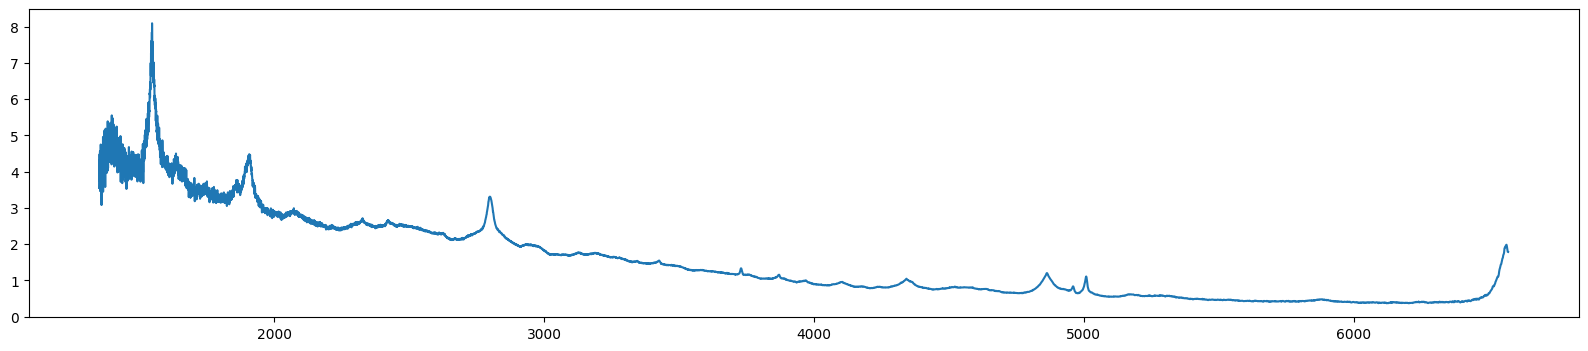

In [64]:
hdul = fits.open('../data/spDR2-032.fit')
data = hdul[0].data  # shape (4, Npix)
header = hdul[0].header
        
# Extract flux: first row is the raw spectrum
flux = data[0]

# Extract log-wavelength coefficients from header
coeff0 = header['COEFF0']  # e.g., log10(lambda_0)
coeff1 = header['COEFF1']  # e.g., log10 step per pixel
        
npix = flux.size
pixel_indices = np.arange(npix)
loglam = coeff0 + coeff1 * pixel_indices
wavelength = 10 ** loglam

# Plot
plt.figure(figsize=(20,4))
plt.plot(wavelength, flux)